In [10]:
#=
N=1
t=100
Y1=Matrix{Float64}(undef,t,N)
randx=zeros(Float64,N)
for j=1:t
    randx=rand(Float64,N).-0.25
    Y1[j,:]=randx
end

Y2=Matrix{Float64}(undef,t,N)
for j=1:t
    randx=-rand(Float64,N).+0.25
    Y2[j,:]=randx
end

d=4
=#

In [11]:
#=
data="/home/hoanganh/Desktop/math-topics/algebraic_statistics/codes/datasets/plot" # path of data
output_file = open(data*"/univariate_Christoffel_data2.jl","w")

write(output_file, "d = $(d)")
write(output_file, "; \n \n")
write(output_file, "N = $(N)")
write(output_file, "; \n \n")
write(output_file, "t = $(t)")
write(output_file, "; \n \n")
write(output_file, "Y1 = ")
show(output_file, Y1)
write(output_file, "; \n \n")
write(output_file, "Y2 = ")
show(output_file, Y2)
write(output_file, "; \n \n")

close(output_file)
=#

In [12]:
data="/home/hoanganh/Desktop/math-topics/algebraic_statistics/codes/datasets/plot" # path of data
include(data*"/univariate_Christoffel_data2.jl");

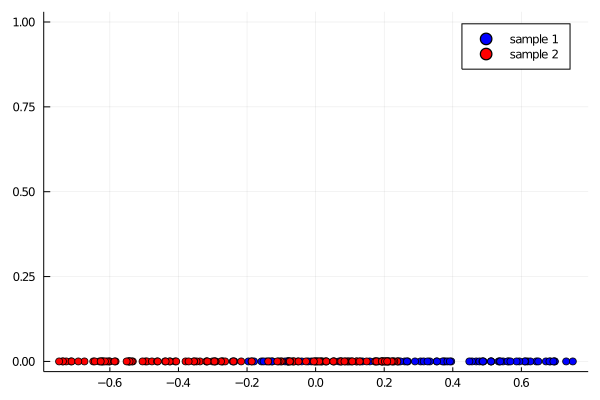

In [13]:
using Plots

#p_exact(z)=0.5
scatter(Y1[:,1], zeros(Float64,t),label ="sample 1",color="Blue")
scatter!(Y2[:,1], zeros(Float64,t),label ="sample 2",color="Red")
#plot!(p_exact, -r, r, label ="exact 1")

In [14]:
include("../src/ClassificationModels.jl")
using .ClassificationModels

Lambda1=ClassificationModels.christoffel_func(N,Y1,t,d);

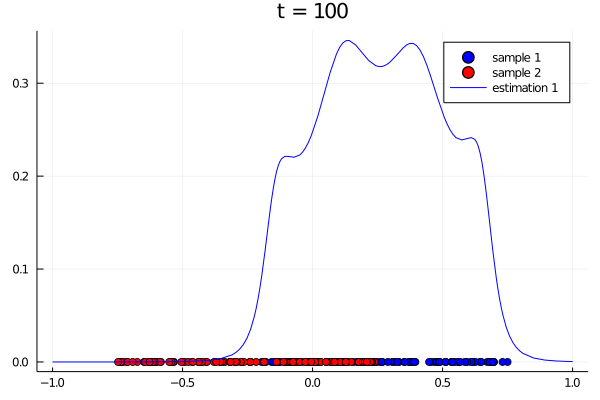

In [15]:
r=1

p_approx1(z)=Lambda1([z;zeros(N-1)])
plot!(p_approx1, -r, r, label = "estimation 1",#=legend=:bottomright,=#title = "t = $(t)",color="Blue")

In [16]:
include("../src/ClassificationModels.jl")
using .ClassificationModels


Lambda2=ClassificationModels.christoffel_func(N,Y2,t,d);

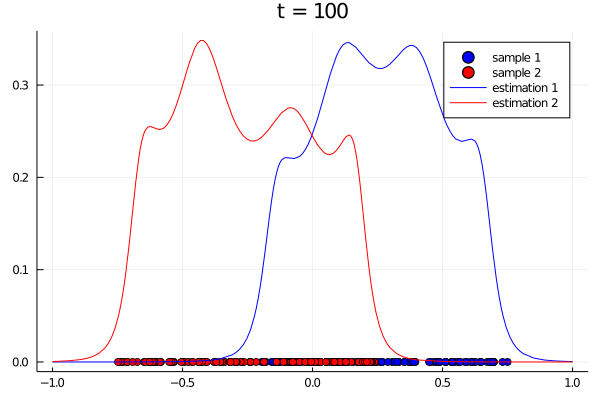

In [17]:

p_approx2(z)=Lambda2([z;zeros(N-1)])
plot!(p_approx2, -r, r, label = "estimation 2",#=legend=:bottomright,=#title = "t = $(t)",color="Red")

In [18]:
savefig(data*"/univariate_classification_numsamp_CF$(t).png")